<a href="https://colab.research.google.com/github/sumantsharma16/machine-learning/blob/main/06_ML_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class label', 'Alcohol','Malic acid']

In [3]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


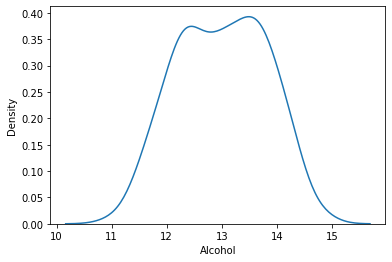

In [4]:
sns.kdeplot(df['Alcohol'])

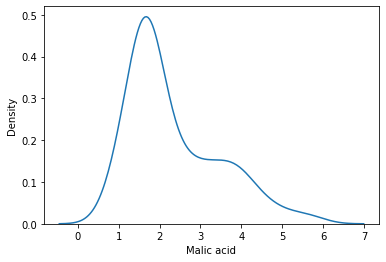

In [5]:
sns.kdeplot(df['Malic acid'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


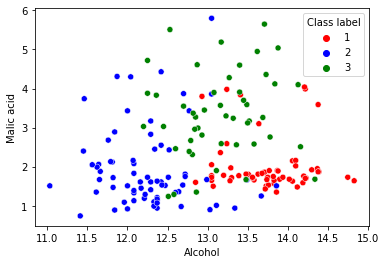

In [6]:
color_dict = {1:'red', 3:'green', 2:'blue'}
sns.scatterplot(df['Alcohol'], df['Malic acid'], hue=df['Class label'], palette=color_dict)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

In [8]:
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [13]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [14]:
np.round(x_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0
